# Visualizing the Distribution of Titanic Passengers
In this small project we'll be working with a data set of the passengers of the Titanic using seaborn library. The Titanic shipwreck is the most famous shipwreck in history and led to the creation of better safety regulations for ships. One substantial safety issue was that there were not enough lifeboats for every passenger on board, which meant that some passengers were prioritized over others to use the lifeboats.

The data can be found [here](https://www.kaggle.com/c/titanic/data).

There are two files:

- `train.csv`: Contains data on 891 passengers
- `test.csv`: Contains data on 418 passengers

Each row in both data sets represents a passenger on the Titanic, and some information about them. We'll be working with the train.csv file, because the `Survived` column, which describes if a given passenger survived the crash, is preserved in the file. Here are descriptions for each of the columns in train.csv:

- PassengerId -- A numerical id assigned to each passenger.
- Survived -- Whether the passenger survived (1), or didn't (0).
- Pclass -- The class the passenger was in.
- Name -- the name of the passenger.
- Sex -- The gender of the passenger -- male or female.
- Age -- The age of the passenger. Fractional.
- SibSp -- The number of siblings and spouses the passenger had on board.
- Parch -- The number of parents and children the passenger had on board.
- Ticket -- The ticket number of the passenger.
- Fare -- How much the passenger paid for the ticket.
- Cabin -- Which cabin the passenger was in.
- Embarked -- Where the passenger boarded the Titanic.

Let's open our dataset and explore it:

In [1]:
import pandas as pd
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
titanic.shape

(891, 12)

Let's remove columns like `Name` and `Ticket` that we don't have a way to visualize. We will be working with seaborn library. So we need to remove any rows containing missing values as seaborn will throw errors when we try to plot missing values.

In [4]:
titanic = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
titanic = titanic.dropna()
titanic.shape

(712, 8)

## Visualizing the Age Distribution of all Passengers

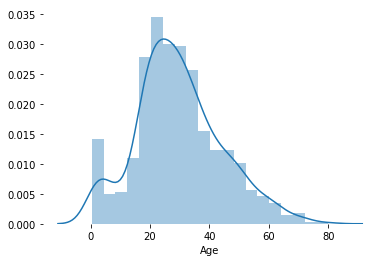

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

sns.distplot(titanic['Age'])
sns.despine(left=True, bottom=True)
plt.show()

## Visualizing the Differences in Age Distributions between Passengers who Survived and Those who Didn't

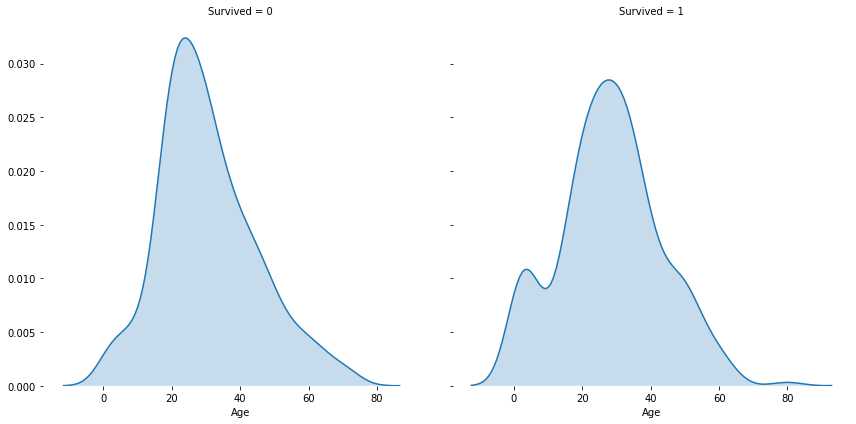

In [6]:
g = sns.FacetGrid(titanic, col="Survived", height=6)
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

As we can see, the category which tent to survive was kids as well as 80-years-old passengers, while young people around 20 years old had more chances to die. That seems logic as priority for lifeboard was given to small kids and older people. As well, there is a drop in survivers at the age of 10-15 years old but it can be explained by smaller quantity of kids that age among the passengers as you could in the previous plot.

## Visualizing the Age Distributions for Each Class

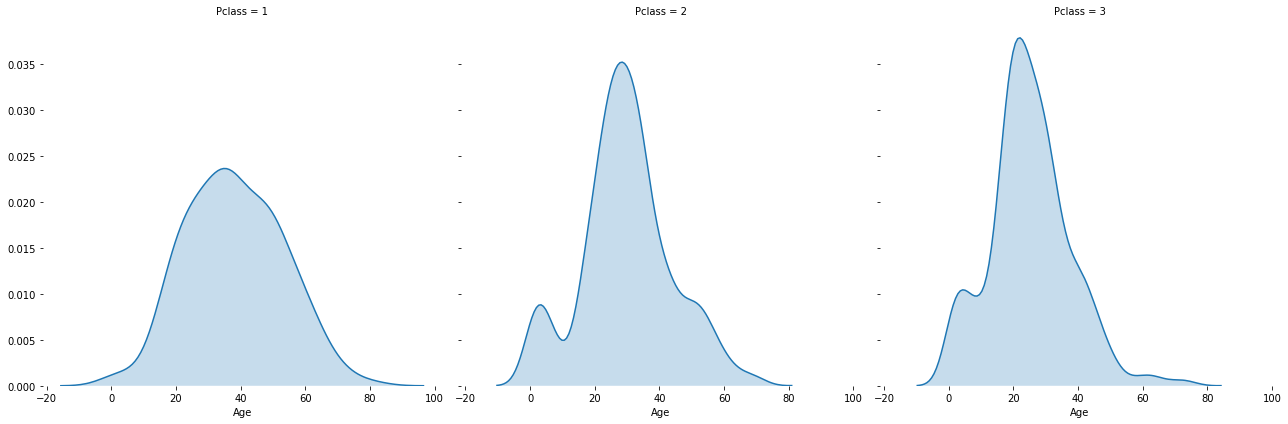

In [7]:
g = sns.FacetGrid(titanic, col='Pclass', height=6)
g.map(sns.kdeplot, 'Age', shade=True)
sns.despine(left=True, bottom=True)
plt.show()

## Visualizing the Age Distributions According to Class, Sex and Survival.

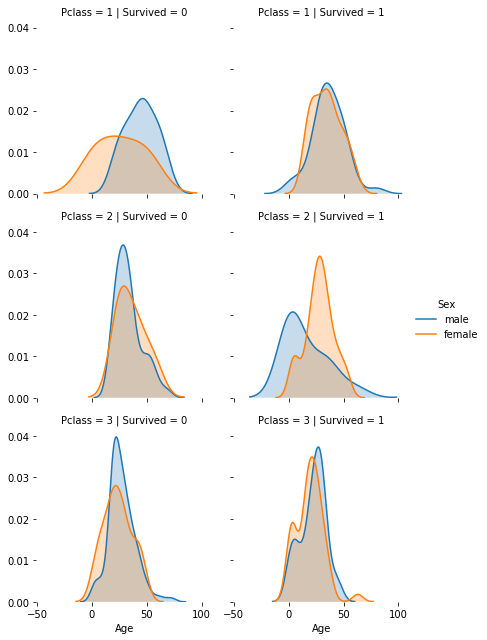

In [8]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue='Sex', height=3)
g.map(sns.kdeplot, "Age", shade=True)
g.add_legend()
sns.despine(left=True, bottom=True)
plt.show()

Analysing the plots above, we can see that women had more chances to survive than to die in all classes but especially it's true for the first class. Men had the lowest surviving rate in the second class where survivers were mostly kids, while in the first and third classes the quantity of survivers and non-survivers are similar. We also see that the tendency of surviving kids and older people maintains noticable in second and third classes.